# STOR 120: Practice Final Exam

**Directions:** The exam is open book, notes, course materials, internet, and all things that are not direct communication with others. For each question you may use as many lines of code as needed, and may add cells as well. Throughout the semester we have written many functions that you can reuse for this exam. There is no need to start from scratch!

Run the cell below.

In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Wine!

(i.e. I miss living in Sonoma County...)

![Kunde Winery](https://winecountry-media.s3.amazonaws.com/20605-media-Kunde-SlideshowImage-1600x800.jpg "Kunde Winery")

You have been retained as a statistical consultant for a wine co-operative, and have been asked to analyze their data. Each row in the *wine* data set represents data on a particular wine, and the columns are the wines’ attributes. The first 11 columns of the data contain measurements for various aspects of the wine, such as its *fixed acidity* level, *density*, and percentage of *alcohol*. The *quality* variable is an expert’s ranking of the quality of the wine on a 1-10 scale, with 1 being the lowest rating, and 10 the highest. The *Class* variable has values of 1 for all wines with a quality score of 7 or higher, and 0 for quality scores below 7. The color variable has values of ‘red’ for red wines and ‘white’ for white wines.

A not so random sample of wines was taken for this final exam from data discussed in the following paper:

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties.
*Decision Support Systems, 47*(4), pp 547-553

Variables              | Descriptions
---------------------- | -----------------------------------------------------
_fixed acidity_        | fixed or nonvolatile acids (do not evaporate readily)
_volatile acidity_     | acetic acid (at high levels can lead to an unpleasant, vinegar taste)
_citric acid_          | citric acid (can add ‘freshness’ and flavor to wines)
_residual sugar_       | sugar remaining after fermentation stops
_chlorides_            | salt in the wine
_free sulfur dioxide_  | free form of SO2  (prevents microbial growth and the oxidation of wine)
_total sulfur dioxide_ | free and bound forms of S02 (in higher concentrations becomes evident in the nose and taste of wine)
_density_              | density of the wine in grams per mililiter
_pH_                   | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
_sulphates_            | wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
_alcohol_              | percentage alcohol content of the wine
_quality_              | expert’s ranking of the quality of the wine on a 1-10 scale
_Class_                | 1 for all wines with a quality score of 7 or higher, and 0 for quality scores below 7
_color_                | red or white wine

Run the cell below to load the dataset.

In [2]:
wine = Table.read_table('https://raw.githubusercontent.com/JA-McLean/STOR120/24d8a773175576d6a6e570989e79006f1e9abeb8/data/wine.csv')
wine

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphites,alcohol,quality,Class,color
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,white
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,0,white
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,0,white
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,0,white
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,white
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0,white
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5,0,white
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7,1,white
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7,1,white
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5,0,white


## Question 1

As temperatures creep up across the winemaking world, many winemakers, especially in traditionally cooler climates, such as those in Oregon and Washington, are having to figure out how to keep alcohol levels in check. In Oregon in 2009, for example, cumulative growing degree day values for many areas were up 4 to 14 percent over 2008. Because alcohol is a product of fermentation, the riper the grape at the moment when yeast converts grape sugar into alcohol, the higher the wine’s alcohol level is likely to be. The data used for this final exam comes from the Minho region of Portugal, which may be experiencing similar changes in temperatures.

1. **(2 pts)** Determine the mean alcohol percentage of the wines in the data set. 

In [3]:
mean_alchohol = np.mean(wine.column("alcohol"))
mean_alchohol

10.000999999999998

2. **(10 pts)** Construct a 90% confidence interval for the mean alcohol percentage for all wines in this region at the given time. To receive full credit you should: 
   
   * take bootstrap samples from the original sample, 
   * find your bootstrap statistic, repeat 5000 times, and 
   * determine the upper and lower bounds of the confidence interval. 

In [66]:
mean_alchohol = make_array()

for i in np.arange(5000):
    bootstrap = wine.sample()
    bootstrap_mean =np.mean(bootstrap.column('alcohol'))
    mean_alchohol = np.append(mean_alchohol, bootstrap_mean)
    
lower_bound = percentile(5, mean_alchohol)
upper_bound = percentile(95, mean_alchohol)

lower_bound, upper_bound

(9.8580000000000005, 10.162000000000001)

3. **(4 pts)** Does this confidence interval provide evidence at the 0.05 significance level that the mean alcohol percentage for all wines in this region at the given time is greater than 9.75%? Why? 

No, this confidence interval cannot provide evidence at the 0.05 significance level since we are using a 90% confidence interval. In order to use a confidence interval to provide evidence at 0.05 signifiance, we instead need a 95% confidence interval. 

## Question 2

Next you will investigate the relationship between the *density* and percentage of the *alcohol* in the wine. The percentage of alcohol in the wine is dependent on the difference in the density before and after fermentation. The *density* variable in this data set is the density of the wine after fermentation.

1. **(4 pts)** Produce a scatter plot with *density* on the horizontal axis, *alcohol* on the vertical axis, and the best fit line for this relationship.

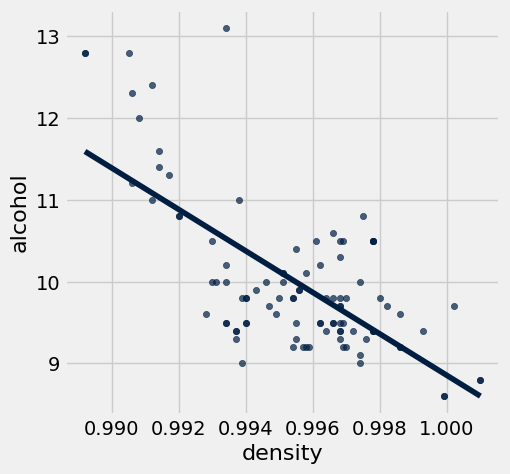

In [5]:
wine.scatter("density", "alcohol", fit_line = 1)

2. **(6 pts)** Determine the slope and intercept for this best fit line

In [7]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

r = correlation(wine, "density", "alcohol")

def slope(t, x, y):
    """t is a table; x and y are column labels"""
    r = correlation(t, x, y)
    slope_xy = r * np.std(t.column(y)) / np.std(t.column(x))
    return slope_xy

def intercept(t, x, y):
    """t is a table; x and y are column labels"""
    slope_xy = slope(t, x, y)
    intercept_xy = np.average(t.column(y) - slope_xy * np.average(t.column(x)))
    return intercept_xy

print("Slope = ", slope(wine, "density", "alcohol"), "Intercept = ", intercept(wine, "density", "alcohol"))

Slope =  -253.455966744 Intercept =  262.310078494


3. **(2 pts)** For a 0.001 change in wines' density, what does this model predict will be the change in the percentage of alcohol? You should have a numerical answer and do *not* need to construct a confidence interval.

In [9]:
change_in_percent = 0.001 * slope(wine, "density", "alcohol")
print("For a 0.001 change in wines' density, this model will predict a change in the percentage of alcohol as", change_in_percent)

For a 0.001 change in wines' density, this model will predict a change in the percentage of alcohol as -0.253455966744


4. **(8 pts)** You constructed a model to predict *alcohol* from *density* using all wines in the data set, which included both red and white wines. A possible issue is that the relationship between   *density* and *alcohol* could be different for red and white wines. Construct a function that:
    
   * takes in a wine's *density* and *color* ('red' or 'white') as its arguments. 
   * if the wine is red, then the function should predict the *alcohol* percentage of the wine from a regression line constructed using **only the red** wines in the dataset. 
   * if the wine is white, then the function should predict the *alcohol* percentage of the wine from a regression line constructed using **only the white** wines in the dataset. 

In [11]:
def prediction(density, color):
    red_slope = slope(wine.where("color", "red"), "density", "alcohol")
    red_intercept = intercept(wine.where("color", "red"), "density", "alcohol")
    white_slope = slope(wine.where("color", "white"), "density", "alcohol")
    white_intercept = intercept(wine.where("color", "white"), "density", "alcohol")
    if color == "red":
        return red_slope * density + red_intercept
    if color == "white":
        return white_slope * density + white_intercept

5. **(2 pts)** Run the function for a red wine with a density of 0.998 and then a white wine with a density of 0.998

In [12]:
print("The alcohol percentage for a red wine with a density of 0.998 is", prediction(0.998, "red"))
print("The alcohol percentage for a white wine with a density of 0.998 is", prediction(0.998, "white"))

The alcohol percentage for a red wine with a density of 0.998 is 9.11138085321
The alcohol percentage for a white wine with a density of 0.998 is 9.5442652483


## Question 3

Can a wine's *fixed acidity*, *volatile acidity*, and *residual sugar* be used to predict if it will be considered high quality (*Class* = 1)? To answer this question, you should implement a k-Nearest Neighbors algorithm (with k=7) using these three variables as your features.

**To receive full credit you should:**

1. **(6 pts)** Construct a table that includes the three predictor variables in standard units and the Class for each wine

In [15]:
wine_predictor = Table().with_columns(
    "fixed acidity su", standard_units(wine.column("fixed acidity")),
    "volatile acidity su", standard_units(wine.column("volatile acidity")),
    "residual sugar su", standard_units(wine.column("residual sugar")),
    "Class", wine.column("Class")
)
wine_predictor

fixed acidity su,volatile acidity su,residual sugar su,Class
0.127252,1.40007,-0.47982,0
0.558614,2.31282,-0.31946,0
0.558614,1.70432,-0.388186,0
4.22519,-0.729698,-0.47982,0
0.127252,1.40007,-0.47982,0
0.127252,1.19723,-0.502729,0
0.666455,0.89298,-0.548546,0
0.0194113,1.14652,-0.640181,1
0.558614,0.791562,-0.456912,1
0.235092,0.385893,0.48234,0


2. **(6 pts)** Randomly assign training and testing datasets, with 70% of the data in the training set.

In [81]:
shuffled_table = wine_predictor.sample(with_replacement=False)

train = shuffled_table.take(np.arange(70))
test = shuffled_table.take(np.arange(70, 100))

print("Training set:\t",   train.num_rows, "examples")
print("Test set:\t",       test.num_rows, "examples")
train.show(5), test.show(5)

Training set:	 70 examples
Test set:	 30 examples


fixed acidity su,volatile acidity su,residual sugar su,Class
0.666455,0.0309323,-0.548546,0
-1.16683,1.19723,-0.640181,1
1.74486,0.994397,-0.0216486,0
0.558614,0.89298,-0.365278,0
0.0194113,-0.932532,3.19701,0


fixed acidity su,volatile acidity su,residual sugar su,Class
0.127252,1.40007,-0.47982,0
-0.0884292,-0.983241,1.03215,0
-1.05899,-0.62828,-0.548546,0
-1.16683,-1.54104,-0.445458,0
-0.843313,-0.171902,0.32198,0


(None, None)

3. **(4 pts)** Use the training data to classify a wine with a *fixed acidity* of 6.6, *volatile acidity* of 0.92, and a residual sugar of 1. 

In [82]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(list(new_point)), np.array(list(row)))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

Fixed_acidity_su = (6.6 - np.mean(wine.column("fixed acidity"))) / np.std(wine.column("fixed acidity"))
Volatile_acidity_su = (0.92 - np.mean(wine.column("volatile acidity"))) / np.std(wine.column("volatile acidity"))
Residual_sugar_su = (1 - np.mean(wine.column("residual sugar"))) / np.std(wine.column("residual sugar"))

print("a wine with a fixed acidity of 6.6, volatile acidity of 0.92, and a residual sugar of 1 is of Class", classify(train, make_array(Fixed_acidity_su, Volatile_acidity_su, Residual_sugar_su), 7), ", i.e. the wine is not high quality")

a wine with a fixed acidity of 6.6, volatile acidity of 0.92, and a residual sugar of 1 is of Class 0 , i.e. the wine is not high quality


4. **(4 pts)** Evaluate the accuracy of your classifier with the testing data.

In [83]:
def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows

print("The accuracy of this classifier is", evaluate_accuracy(train, test, 7))

The accuracy of this classifier is 0.9


## Question 4

Are red wines of higher quality than white wines? A better question might be: do experts rate red wines more highly than white wines? One expert method of rating wines involves a 1-50 point scale (which has been simplified in this dataset to a 1-10 scale). The wine gets up to 5 points on color, up to 15 on bouquet and aroma, and up to 20 points on flavor, harmony and length. The balance of 10 points are awarded to wines that have the ability to improve in the bottle. Because of that 10-point cushion, points are assigned to the overall quality but also to the potential period of time that wine can provide pleasure. White Burgundies today have a lifespan of, at most, a decade with rare exceptions. Most top red wines can last 15 years and most top Bordeaux can last 20, 25 years. 

Does this data suggest that the proportion of high quality red wines is greater than that of white wines? The *Class* variable can be used to denote high quality, having values of 1 for all wines with a quality score of 7 or higher, and 0 for quality scores below 7. Perform a hypothesis test (at the 0.05 significance level) to examine this claim.

For the test statistic, use the proportion of red wines that are high quality (Class = 1) minus the proportion of white wines that are of high quality (Class = 1)

**To receive full credit you should:**

1. **(4 pts)** Determine the value of the observed test statistic

In [86]:
observed_statistic = wine.where("color", "red").where("Class", 1).num_rows / wine.where("color", "red").num_rows - wine.where("color", "white").where("Class", 1).num_rows / wine.where("color", "white").num_rows
observed_statistic

0.08

2. **(6 pts)** Shuffle the labels of the original sample, find your simulated test statistic, and repeat 5000 times

In [96]:
def test_statistic(table):
    return table.where("color", "red").where("Class", 1).num_rows / table.where("color", "red").num_rows - table.where("color", "white").where("Class", 1).num_rows / table.where("color", "white").num_rows

def one_simulated_difference(table, num_var, categ_var):
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(categ_var)
     
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(num_var).with_column(
        'color', shuffled_labels)
    
    return test_statistic(shuffled_table)   

differences = make_array()

for i in np.arange(1000):
    new_difference = one_simulated_difference(wine, 'Class', 'color')
    differences = np.append(differences, new_difference)

p_value = sum(differences >= observed_statistic) / 5000
p_value

0.035400000000000001

3. **(4 pts)** Plot your simulated statistics in a histogram (as well as the observed test statistic)

Observed Statistic: 0.08


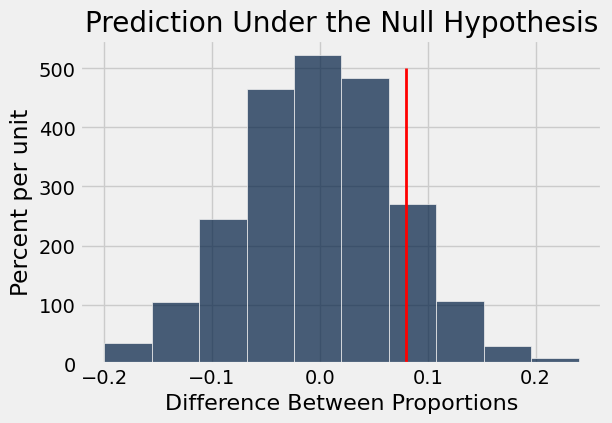

In [95]:
Table().with_column('Difference Between Proportions', differences).hist()
print('Observed Statistic:', observed_statistic)
plots.title('Prediction Under the Null Hypothesis');
plots.plot([observed_statistic, observed_statistic], [0, 5], color='red', lw=2);

4. **(4 pts)** Calculate the p-value based off of your observed and simulated test statistics

In [97]:
p_value = sum(differences >= observed_statistic) / 5000
p_value

0.035400000000000001

5. **(4 pts)** Use the p-value to draw a conclusion

Since the p-value is 0.0354, which is less than the 0.05 cutoff, we fail to reject the null hypotheiss. This data failed to suggest that the proportion of high quality red wines is greater than that of white wines.